In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings


from statsmodels.tsa.stattools import acf
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import bartlett
from scipy.stats import levene
from sqlalchemy import create_engine
from sklearn import linear_model

warnings.filterwarnings('ignore')

## First Question

Checking Hungary Weather Data for Gauss Markov assumptions

In [55]:
df = pd.read_csv('weatherHis.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Model

In [56]:
df1 = df[['Humidity','Wind Speed (km/h)', 'Pressure (millibars)','Temperature (C)']]
X = df[['Humidity','Wind Speed (km/h)', 'Pressure (millibars)']]
Y = df[['Temperature (C)']]

lrm_exp = linear_model.LinearRegression()
lrm_exp.fit(X,Y)
prediction = lrm_exp.predict(X)

print('Coefficients: \n', lrm_exp.coef_)
print('(bias): \n', lrm_exp.intercept_)

Coefficients: 
 [[-3.24398999e+01 -1.94546893e-01 -7.15579969e-04]]
(bias): 
 [38.59379935]


In [5]:
# Assumption 1
# The regression model is linear in the coefficients and the error term

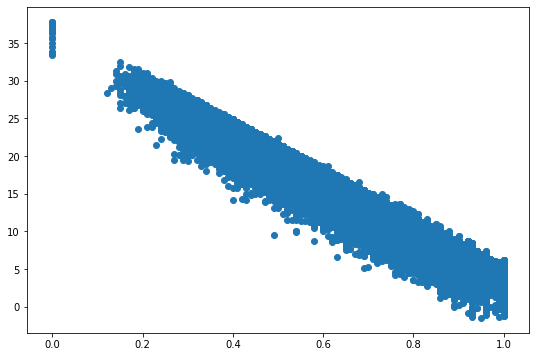

In [57]:
plt.figure(figsize=(9,6))
plt.scatter(df1["Humidity"], prediction)
plt.show()

In [7]:
# Assumption 2
# The error term has a population mean of zero

In [58]:
errors = Y - prediction

print("mean error : {}".format(np.mean(errors)))

mean error : Temperature (C)    3.394587e-16
dtype: float64


In [9]:
# Assumption 3
# Homoscedasticity

In [59]:
bart_stats = bartlett(prediction, errors)
lev_stats = levene(prediction, errors)

print("Bartlett: {} p value : {:.5f}".format(int(bart_stats[0]), int(bart_stats[1])))
print("Levene: {} p value : {:.5f}".format(int(lev_stats[0]), int(lev_stats[1])))

ValueError: Samples must be one-dimensional.

In [ ]:
# Assumption 4
# low multicollinearity

In [60]:
corr_mat = df1.corr()
corr_mat

,Humidity,Wind Speed (km/h),Pressure (millibars),Temperature (C)
Humidity,1.000000,-0.224951,0.005454,-0.632255
Wind Speed (km/h),-0.224951,1.000000,-0.049263,0.008957
Pressure (millibars),0.005454,-0.049263,1.000000,-0.005447
Temperature (C),-0.632255,0.008957,-0.005447,1.000000


### All of them are low

In [ ]:
# Assumption 5
# Observations of the error term are uncorrelated with each other

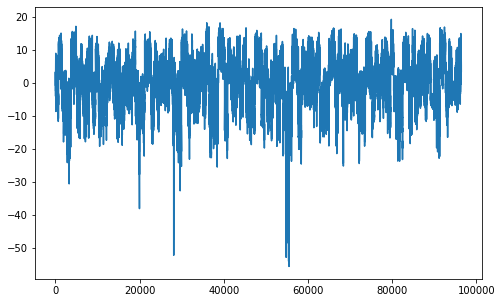

In [61]:
plt.figure(figsize=(8,5))
plt.plot(errors)
plt.show()

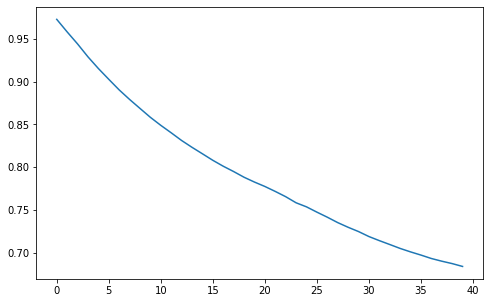

In [46]:
acf_dt=acf(errors)

plt.figure(figsize=(8,5))
plt.plot(acf_dt[1:])
plt.show()

They have a relation! X

In [ ]:
# Assumption 6
# All independent variables are uncorrelated with the error term - exogeneity

In [ ]:
# naptıysam grafiği çizmedi :S
normal_random=np.random.normal(errors.mean(), errors.std(), len(errors))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(normal_random, errors)

plt.subplot(1,2,2)
plt.hist(errors)

plt.show()

In [11]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test: {} and p value : {:.5f}".format(jb_stats[0], jb_stats[1]))
print("Normal test: {}  and p value : {:.5f}".format(int(norm_stats[0]), int(norm_stats[1])))

Jarque-Bera test: 3852.043000938128 and p value : 0.00000
Normal test: 3420  and p value : 0.00000


## Second Question

In [12]:
df2 = pd.read_csv("trainh.csv")
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df2 = df2.drop([ 'PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu', 'PoolQC', 'MiscFeature'], axis = 1)

In [14]:
df2["LotFrontage"].fillna(df2["LotFrontage"].mean(), inplace=True)

In [15]:
df2["GarageYrBlt"].fillna(df2["GarageYrBlt"].mean(), inplace=True)

In [16]:
df2.dropna(inplace=True)

In [40]:
df2df = df2[['SalePrice', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]
Ydf=df2["SalePrice"]
Xdf=df2[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", 'GarageCars', 'GarageArea']]

regr=linear_model.LinearRegression()
regr.fit(Xdf, Ydf)

prediction2 = regr.predict(Xdf)

print('Coefficients: \n', regr.coef_)
print('(bias): \n', regr.intercept_)

Coefficients: 
 [2.49034331e+04 2.84934808e+01 5.68225603e+00 4.45296558e+01
 1.67860046e+04 1.88031639e+01]
(bias): 
 -115352.98161169502


In [25]:
Xdf=sm.add_constant(Xdf)
sonuc=sm.OLS(Ydf, Xdf).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     683.5
Date:                Sat, 05 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:18:46   Log-Likelihood:                -16045.
No. Observations:                1338   AIC:                         3.210e+04
Df Residuals:                    1331   BIC:                         3.214e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.154e+05   5301.567    -21.758      0.000   -1.26e+05   -1.05e+05
OverallQual   2.49e+04   1152.008     21.617      0.000    2.26e+04    2.72e+04
TotalBsmtSF    28.4935      6.163      4.623      0.000      16.403      40.584
1stFlrSF        5.6823      6.643      0.855      0.392      -7.349      18.714
GrLivArea      44.5297      2.864     15.547      0.000      38.911      50.148
GarageCars   1.679e+04   3222.711      5.209      0.000    1.05e+04    2.31e+04
GarageArea     18.8032     10.791      1.742      0.082      -2.367      39.973
==============================================================================
Omnibus:                      469.114   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43703.049
Skew:                          -0.646   Prob(JB):                         0.00
Kurtosis:                      30.969   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print("SalePrice= {:.3f} +\n {:.3f} OverallQual +\n {:.3f} TotalBsmtSF +\n {:.3f} 1stFlrSF +\n {:.3f} GrLivArea +\n {:.3f} GarageCars +\n {:.3f}  GarageArea +\n"
      .format(regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3], regr.coef_[4], regr.coef_[5]))

SalePrice= -115352.982 +
 24903.433 OverallQual +
 28.493 TotalBsmtSF +
 5.682 1stFlrSF +
 44.530 GrLivArea +
 16786.005 GarageCars +
 18.803  GarageArea +



In [20]:
# Assumption 1

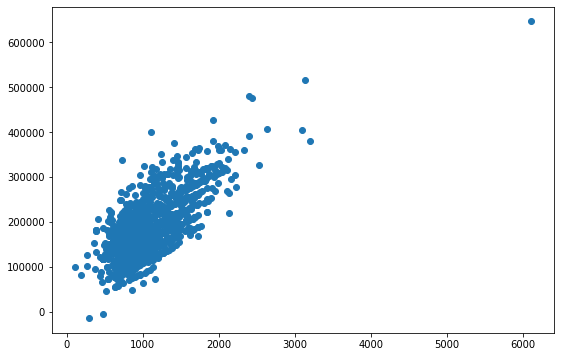

In [29]:
plt.figure(figsize=(9,6))
plt.scatter(df2["TotalBsmtSF"], prediction2)
plt.show()

In [30]:
# Assumption 2

In [33]:
errors2 = Ydf - prediction2

print("mean error : {:.18f}".format(np.mean(errors2)))

mean error : -0.000000000002001160


In [34]:
# Assumption 3

In [36]:
bart_stats2 = bartlett(prediction2, errors2)
lev_stats2 = levene(prediction2, errors2)

print("Bartlett: {} p value : {:.10f}".format(int(bart_stats2[0]), int(bart_stats2[1])))
print("Levene: {} p value : {:.10f}".format(int(lev_stats2[0]), int(lev_stats2[1])))

Bartlett: 402 p value : 0.0000000000
Levene: 387 p value : 0.0000000000


In [37]:
# Assumption 4

In [41]:
corr_mat2 = df2df.corr()
corr_mat2

,SalePrice,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
SalePrice,1.000000,0.783546,0.602042,0.604714,0.711706,0.640154,0.607535
OverallQual,0.783546,1.000000,0.505897,0.481978,0.594470,0.591878,0.530092
TotalBsmtSF,0.602042,0.505897,1.000000,0.893110,0.460778,0.453427,0.511475
1stFlrSF,0.604714,0.481978,0.893110,1.000000,0.554846,0.440237,0.500071
GrLivArea,0.711706,0.594470,0.460778,0.554846,1.000000,0.483943,0.477868
GarageCars,0.640154,0.591878,0.453427,0.440237,0.483943,1.000000,0.832166
GarageArea,0.607535,0.530092,0.511475,0.500071,0.477868,0.832166,1.000000


In [43]:
# totalBsmtSF ile 1stFlrSF high correlation!!! Model is not successful

In [44]:
# assumption 5

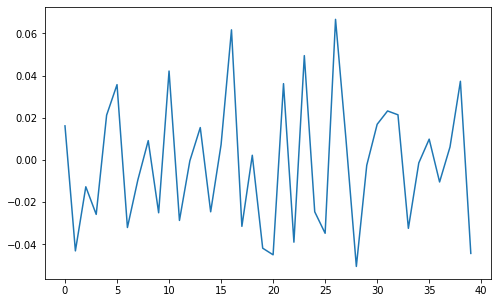

In [47]:
acf_dt=acf(errors2)

plt.figure(figsize=(8,5))
plt.plot(acf_dt[1:])
plt.show()

In [48]:
# errors haven't any relation

In [49]:
# Assumption 6

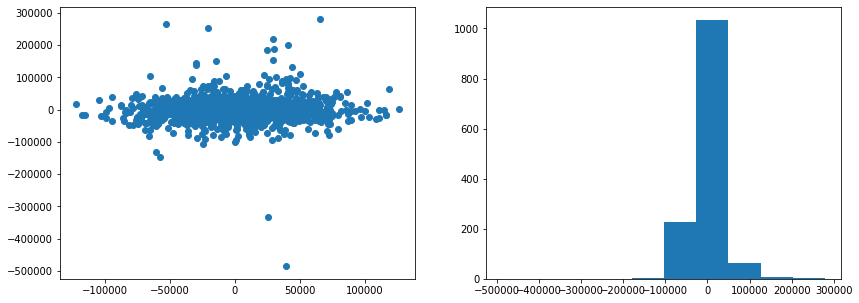

In [52]:
normal_random=np.random.normal(errors2.mean(), errors2.std(), len(errors2))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(normal_random, errors2)

plt.subplot(1,2,2)
plt.hist(errors2)

plt.show()

In [53]:
jb_stats2 = jarque_bera(errors2)
norm_stats2 = normaltest(errors2)

print("Jarque-Bera test: {} and p value : {:.5f}".format(jb_stats2[0], jb_stats2[1]))
print("Normal test: {}  and p value : {:.5f}".format(int(norm_stats2[0]), int(norm_stats2[1])))

Jarque-Bera test: 43703.04878289396 and p value : 0.00000
Normal test: 469  and p value : 0.00000


errors dont have normal distribution